In [417]:
import matplotlib.pyplot as plt

In [418]:
import numpy as np

In [419]:
from sklearn.preprocessing import MinMaxScaler

## FUNCTIONS

In [420]:
def ConvertGrayScale(rgbImage):
    return np.dot(rgbImage[:,:,:3], [0.2989, 0.587, 0.114])

In [421]:
def QuantizeImage(img, Q=10):
    return np.around(np.around(img/Q, 3)*Q, 3)

## Read Original Image

In [422]:
img = plt.imread('resources/lenna.png')

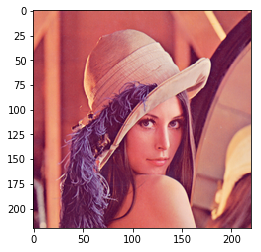

In [423]:
plt.imshow(img)

## Convert Original Image to GrayScale

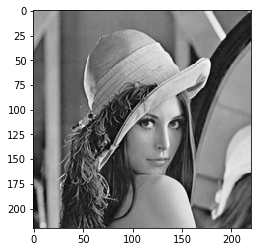

In [424]:
img2 = ConvertGrayScale(img)
plt.imshow(img2, cmap='gray')

## Quantize Image

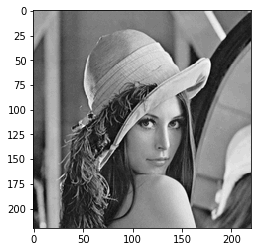

In [425]:
img3 = QuantizeImage(img2, Q=20)
plt.imshow(img3, cmap='gray')

## Encode Image (Using Length Encoder)

In [426]:
cnt = 0
curr_el = img3[0,0]

encoded = []

for i in range(img3.shape[0]):
    for j in range(img3.shape[1]):
        if img3[i,j] == curr_el:
            cnt += 1
        else:
            encoded.append('{0}!{1}'.format(curr_el, cnt))
            curr_el = img3[i, j]
            cnt = 1        
            
encoded.append('{0}!{1}'.format(curr_el, cnt))

In [427]:
encoded

['0.64!2',
 '0.62!1',
 '0.64!2',
 '0.62!4',
 '0.6!1',
 '0.62!1',
 '0.6!3',
 '0.62!2',
 '0.64!2',
 '0.66!1',
 '0.68!3',
 '0.66!1',
 '0.64!1',
 '0.6!1',
 '0.56!1',
 '0.48!1',
 '0.4!1',
 '0.36!2',
 '0.4!3',
 '0.42!12',
 '0.44!2',
 '0.46!2',
 '0.48!3',
 '0.5!1',
 '0.48!1',
 '0.52!3',
 '0.5!1',
 '0.52!3',
 '0.5!3',
 '0.52!1',
 '0.5!2',
 '0.52!18',
 '0.54!1',
 '0.52!7',
 '0.5!1',
 '0.52!16',
 '0.54!1',
 '0.52!1',
 '0.5!1',
 '0.52!3',
 '0.5!3',
 '0.52!2',
 '0.5!1',
 '0.52!1',
 '0.5!8',
 '0.48!3',
 '0.46!1',
 '0.44!1',
 '0.42!1',
 '0.4!1',
 '0.44!1',
 '0.48!1',
 '0.54!1',
 '0.56!1',
 '0.58!1',
 '0.6!1',
 '0.62!2',
 '0.64!1',
 '0.6!1',
 '0.58!1',
 '0.6!5',
 '0.62!2',
 '0.6!10',
 '0.62!2',
 '0.6!1',
 '0.62!2',
 '0.6!2',
 '0.7!1',
 '0.8!1',
 '0.82!1',
 '0.84!1',
 '0.86!2',
 '0.84!1',
 '0.78!1',
 '0.6!1',
 '0.42!1',
 '0.4!1',
 '0.42!1',
 '0.44!1',
 '0.46!2',
 '0.48!2',
 '0.46!1',
 '0.48!2',
 '0.5!1',
 '0.48!8',
 '0.5!1',
 '0.48!4',
 '0.5!2',
 '0.48!2',
 '0.5!1',
 '0.48!1',
 '0.46!3',
 '0.52!1',
 '

## Decode Image (Using Length Encoder)

In [428]:
original_dimensions = img3.shape
decoded = []

for i in encoded:
    symbol, count = i.split('!')
    decoded.extend([float(symbol)]*int(count))   
    
decoded = np.array(decoded, dtype=np.float64).reshape(original_dimensions)

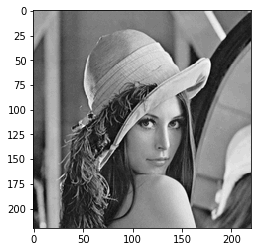

In [429]:
plt.imshow(decoded, cmap='gray')

In [430]:
plt.imsave('resources/lenna_grayscale.png', img2, cmap='gray')

In [431]:
plt.imsave('resources/lenna_compressed.png', decoded, cmap='gray')